## Cloth Identification
### Setup

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from keras.utils import np_utils

# Helper libraries
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
from  IPython import display

# for regularization
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import pathlib
import shutil
import tempfile


  Cloning https://github.com/tensorflow/docs to c:\users\user\appdata\local\temp\pip-req-build-7l2bj0qk
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=177466 sha256=a098970fff13c4b912b8b7ad63ee17479e32409e0cc09503267b938f46feff7d
  Stored in directory: C:\Users\User\AppData\Local\Temp\pip-ephem-wheel-cache-97o4_45o\wheels\3b\ee\a2\ab4d36a9a4af495bcb936f3e849d4b497b65fa40548a68d6c3
Successfully built tensorflow-docs


In [2]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

### Import the Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

### Preprocess the data
#### Display an example

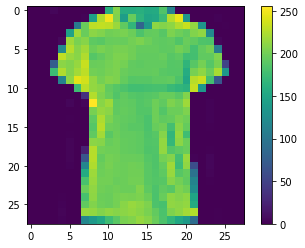

In [10]:
plt.figure()
plt.imshow(train_images[66])
plt.colorbar()
plt.grid(False)
plt.show()

#### Normalize

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### one hot encode outputs

In [12]:
"""
Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is
good practice to use a one hot encoding of the class values, transforming the vector of class integers into a
binary matrix.
We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.

"""
# one hot encode outputs
binary_train_labels = np_utils.to_categorical(train_labels)
binary_test_labels = np_utils.to_categorical(test_labels)

### Plotting many images and changing the color scheme to black and white

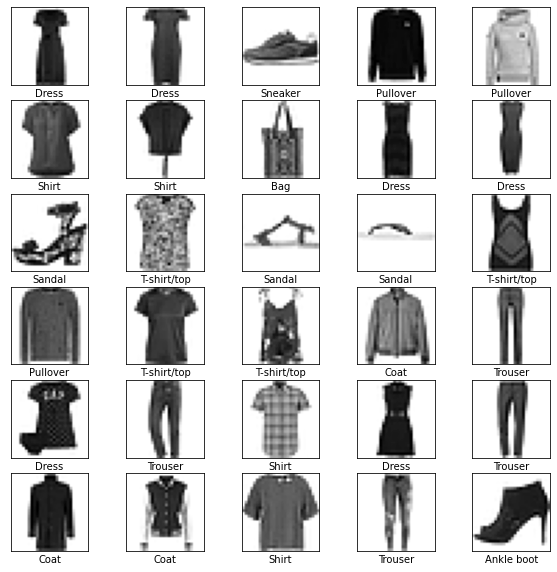

In [13]:
start_index = 50

plt.figure(figsize=(10,10))                               # size of each figure
for i in range(start_index, 80):                          # 30 digits, starting from 50 to 80, this number must match with the size of the grid
    plt.subplot(6,5,i+1-start_index)                      # size of the grid
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)       # make the image B&W
    plt.xlabel(class_names[train_labels[i]])              # class labels
plt.show()

### Build the model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=50, batch_size=100)

Epoch 1/50
600/600 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.8164
Epoch 2/50
600/600 [==============================] - 1s 1ms/step - loss: 0.3974 - accuracy: 0.8602
Epoch 3/50
600/600 [==============================] - 1s 1ms/step - loss: 0.3594 - accuracy: 0.8728
Epoch 4/50
600/600 [==============================] - 1s 1ms/step - loss: 0.3314 - accuracy: 0.8806
Epoch 5/50
600/600 [==============================] - 1s 1ms/step - loss: 0.3157 - accuracy: 0.8855
Epoch 6/50
600/600 [==============================] - 1s 1ms/step - loss: 0.2940 - accuracy: 0.8928
Epoch 7/50
600/600 [==============================] - 1s 1ms/step - loss: 0.2870 - accuracy: 0.8957
Epoch 8/50
600/600 [==============================] - 1s 1ms/step - loss: 0.2723 - accuracy: 0.9008
Epoch 9/50
600/600 [==============================] - 1s 1ms/step - loss: 0.2645 - accuracy: 0.9017
Epoch 10/50
600/600 [==============================] - 1s 1ms/step - loss: 0.2557 - accuracy: 0.9059

In [ ]:
### Build the model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=50, batch_size=100)

### Evaluate accuracy

In [17]:
# Here the code model.evaluate() gives us two outputs the test loss and the accuracy.
# We can see that the loss is higher and accuracy is lower for our test than it was for our training
# This can be caused by overfitting and it can be tacked in a number of ways

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.4873 - accuracy: 0.8776

Test accuracy: 0.8776000142097473


### Improve the model (by adding early stopping)

In [18]:
# The first step to avoid overfitting is to stop the model from running for too many epochs
# This can be achieved by adding an early stopping to our code
# For this to work we should add a method of checking how well our model is doing at each epoch
# This can be done by adding a validation set to be checked at each step

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, name='sparse_categorical_crossentropy'),
                       'accuracy'])

In [21]:
# Here the argument validation_split provides us with a validation set, its size can be adjusted
# The callbacks argument is used to stop the model from overfitting by training for too many epochs,
# it does this by monitoring the validation metric and stop the model when it sees that this metric isn't improving
# the patience determines how many epochs it will wait to see if the metric will improve

model.fit(train_images, train_labels, 
          validation_split = 0.2, 
          epochs=200, 
          batch_size=100,
          callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_crossentropy', patience=20))

Epoch 1/200
480/480 [==============================] - 1s 2ms/step - loss: 0.5707 - sparse_categorical_crossentropy: 0.5707 - accuracy: 0.8038 - val_loss: 0.4505 - val_sparse_categorical_crossentropy: 0.4505 - val_accuracy: 0.8408
Epoch 2/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4137 - sparse_categorical_crossentropy: 0.4137 - accuracy: 0.8535 - val_loss: 0.4261 - val_sparse_categorical_crossentropy: 0.4261 - val_accuracy: 0.8474
Epoch 3/200
480/480 [==============================] - 1s 2ms/step - loss: 0.3700 - sparse_categorical_crossentropy: 0.3700 - accuracy: 0.8670 - val_loss: 0.3893 - val_sparse_categorical_crossentropy: 0.3893 - val_accuracy: 0.8628
Epoch 4/200
480/480 [==============================] - 1s 2ms/step - loss: 0.3393 - sparse_categorical_crossentropy: 0.3393 - accuracy: 0.8770 - val_loss: 0.3556 - val_sparse_categorical_crossentropy: 0.3556 - val_accuracy: 0.8767
Epoch 5/200
480/480 [==============================] - 1s 2ms/step - loss: 0

In [22]:
model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.4081 - sparse_categorical_crossentropy: 0.4075 - accuracy: 0.8841


[0.4080634117126465, 0.40747785568237305, 0.8841000199317932]

In [23]:
# Here the code model.evaluate() gives us two outputs the test loss and the accuracy.
# We can see that the loss is higher and accuracy is lower for our test than it was for our training
# This can be caused by overfitting and it can be tacked in a number of ways

test_loss = model.evaluate(test_images,  test_labels, verbose=2)[0]
test_acc = model.evaluate(test_images,  test_labels, verbose=2)[2]

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.4081 - sparse_categorical_crossentropy: 0.4075 - accuracy: 0.8841
313/313 - 0s - loss: 0.4081 - sparse_categorical_crossentropy: 0.4075 - accuracy: 0.8841

Test accuracy: 0.8841000199317932


### Make predictions

In [24]:
# Here we are looking to check what the model predicts for a given image
# We are attaching a softmax layer in the below code to convert the linear output of the model into a probability

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [25]:
# One of the predictions, a value for each different possibility.  
# The highest possibility is the guess the model makes, in this case that is 9

predictions[0]

array([1.2123617e-12, 4.9047381e-18, 5.2124284e-11, 2.5593372e-14,
       8.1462953e-12, 5.4428193e-07, 4.3412531e-12, 1.2566018e-03,
       2.1307423e-08, 9.9874288e-01], dtype=float32)

#### this takes the max value out of the 10 possibilities

In [26]:
np.argmax(predictions[0])

9

#### Check the label

9


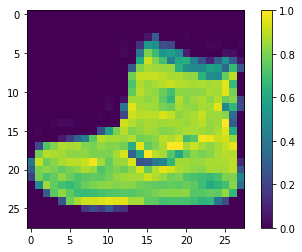

In [27]:
print('Label', test_labels[0])

# To see the visual ourselves
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Display and analyze wrong predictions

In [28]:
# this gives us the indicies all the wrong predictions done by our model on the test set.
# I have done this to check and see visually some of the errors it made, so I will use these indicies to print these digits.

def get_wrong_predictions(length, predictions, test_labels):
    wrong_predictions = []
    for i in range(0, length):
        if np.argmax(predictions[i]) != test_labels[i]:
            wrong_predictions.append(i)
    return wrong_predictions
    

In [1]:
wrong_predictions = get_wrong_predictions(len(test_labels), predictions, test_labels)
print('Number of wrongly predicted images: ', len(wrong_predictions))

NameError: name 'get_wrong_predictions' is not defined

In [30]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("predicted: {} \nconfidence: {:2.0f}% \ntrue: {}".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

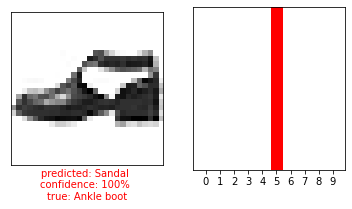

In [31]:
i = wrong_predictions[2]
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

def display_wrong_predictions(num_rows, num_cols, wrong_predictions, predictions, test_labels):
    
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    # we will be going over the indicies of incorrect predictions
    # we need the indicies of that list which contains the indicies of incorrect predictions, example:(16, 43, 53) -> (0, 1, 2)
    for i in wrong_predictions:
        current_index = wrong_predictions.index(i)

        # this stops the current index running out of range
        if current_index == num_images:
            break

        # this part plots the images and the corresponding probabilities assigned to which classes these images may belong to
        # the first 2 rows below are for the images and the bottom 2 rows are for the bar graphs next to them
        # remember that the functions plot_image and plot_value_array were defined by us above
        plt.subplot(num_rows, 2*num_cols, 2*current_index+1)
        plot_image(i, predictions[i], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*current_index+2)
        plot_value_array(i, predictions[i], test_labels)

    plt.tight_layout()
    plt.show()

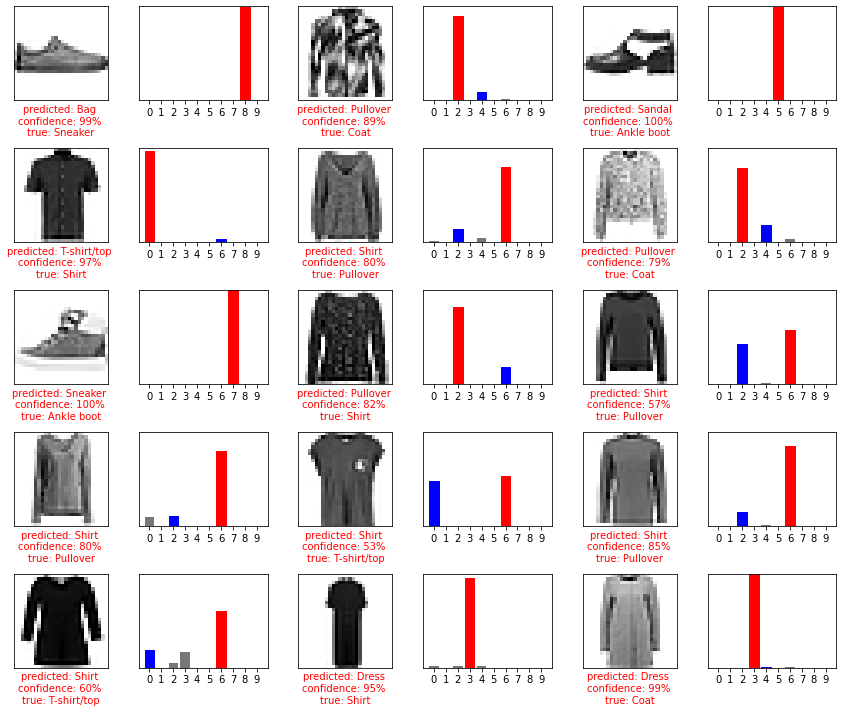

In [33]:
# Creating a grid with size 5x3
num_rows = 5
num_cols = 3
display_wrong_predictions(num_rows, num_cols, wrong_predictions, predictions, test_labels)

We can see that the model needs further improvement, using a convolutional NN could help us get better results.  We will explore some other methods as well to hopefully generate a more accurate model.

### Use the trained model

In [34]:
# Grab an image from the test dataset.
# Add the image to a batch where it's the only member.

img = (np.expand_dims(test_images[1],0))
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)

(1, 28, 28)
[[3.8627095e-05 8.3910472e-17 9.9915695e-01 1.0242161e-11 4.7578520e-04
  5.6470735e-12 3.2866895e-04 4.4663122e-14 5.9560831e-13 2.3020180e-14]]


In [35]:
np.argmax(predictions_single[0])

2

### Source Information

In [45]:
# Source: https://www.tensorflow.org/tutorials/keras/classification

# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
